In [67]:
import pandas as pd
import json

# Path to the JSONL file
file_path = '../data/raw_data/results_galica_api_sample.jsonl'

# Read the JSONL file and convert it to a list of dictionaries
data = []
with open(file_path, 'r') as file:
    for line in file:
        json_line = json.loads(line)
        data.append(json_line)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

28977

In [69]:
# process API results

df_filtered = df[['file_id','title', 'date', 'type', 'setSpec']].copy()
df_filtered = df_filtered.explode('setSpec')
df_filtered = df_filtered[df_filtered['setSpec'].str.contains("theme")]
df_filtered['setSpec'] = df_filtered['setSpec'].apply(lambda x : x.split('gallica:theme:')[1])
df_filtered['category_number'] = df_filtered['setSpec'].apply(lambda x : x.split(':')[0])
df_filtered['sub_category_number'] = df_filtered['setSpec'].apply(lambda x : x.split(':')[1])

df_filtered['category_number'] = df_filtered['category_number'].astype(int)
df_filtered['sub_category_number'] = df_filtered['sub_category_number'].astype(int)

In [70]:
# Merge with data mapping
df_mapping = pd.read_csv('../data/raw_data/galica_mapping_processed.csv')
df_final = pd.merge(df_filtered, df_mapping, on = ['category_number', 'sub_category_number'])
df_final['full_category_name'] = df_final['category_name'] + df_final['sub_category_name']

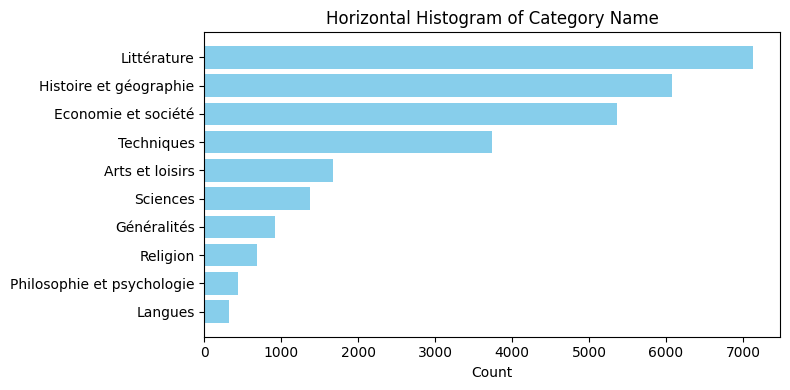

In [71]:
import matplotlib.pyplot as plt

# Count the occurrences of each category_name
category_counts = df_final['category_name'].value_counts()

# Plotting the horizontal histogram
plt.figure(figsize=(8, 4))  # Adjust the figure size if needed
plt.barh(category_counts.index, category_counts.values, color='skyblue')  # Use barh for horizontal bars
plt.ylabel('')  # Swap x and y labels
plt.xlabel('Count')  # Swap x and y labels
plt.title('Horizontal Histogram of Category Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Display the plot
plt.tight_layout()
plt.show()

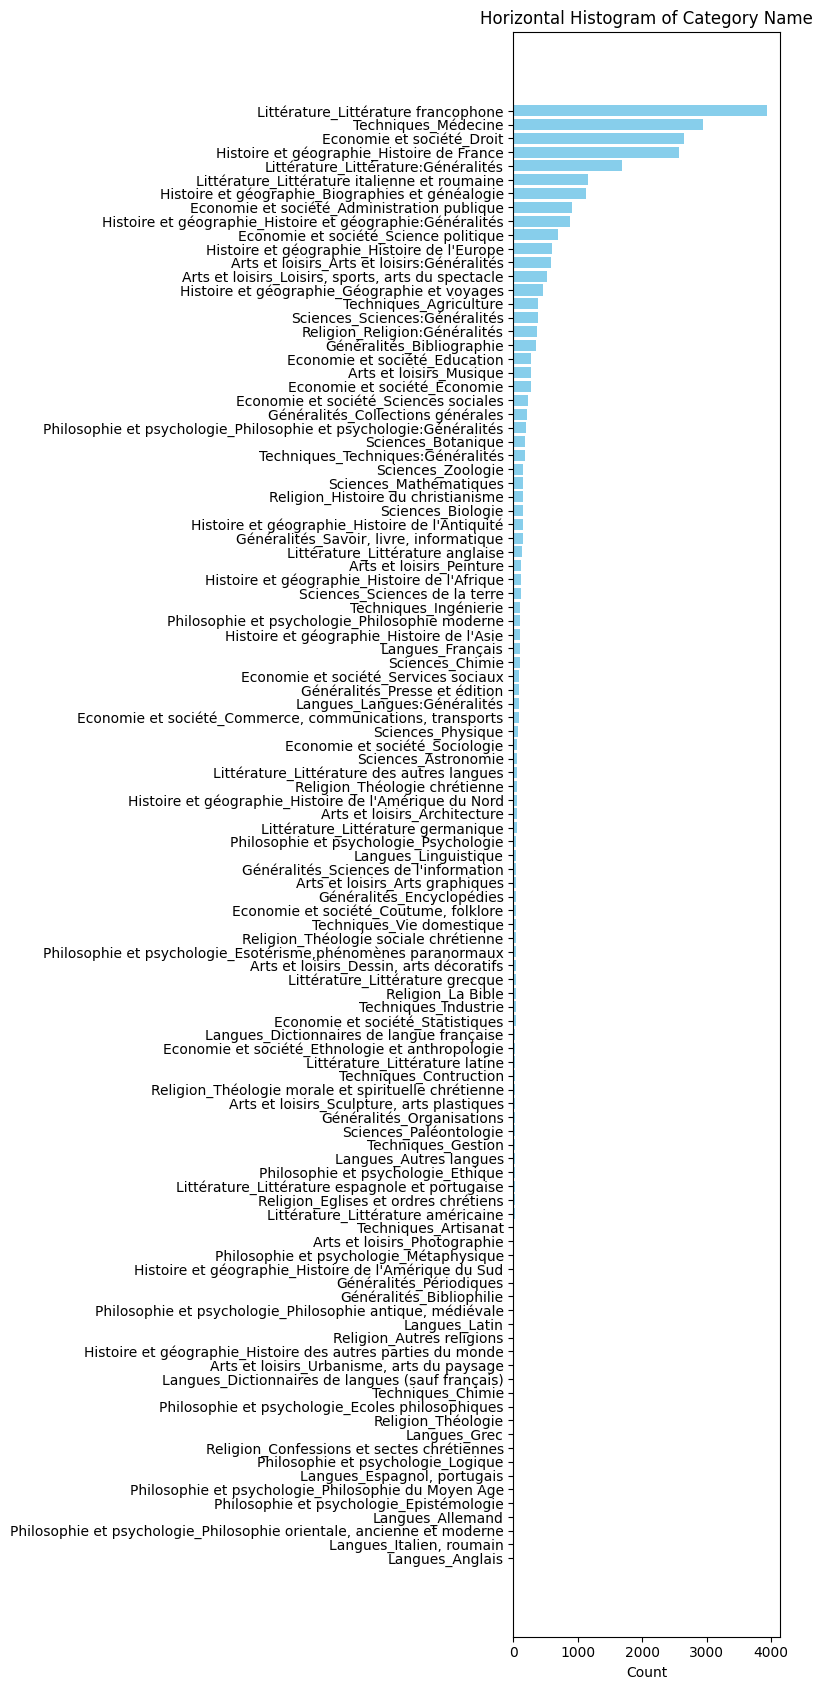

In [72]:
# Count the occurrences of each category_name
category_counts = df_final['full_category_name'].value_counts()

# Plotting the horizontal histogram
plt.figure(figsize=(8, 17))  # Adjust the figure size if needed
plt.barh(category_counts.index, category_counts.values, color='skyblue')  # Use barh for horizontal bars
plt.ylabel('')  # Swap x and y labels
plt.xlabel('Count')  # Swap x and y labels
plt.title('Horizontal Histogram of Category Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Display the plot
plt.tight_layout()
plt.show()

In [81]:
import plotly.express as px

long_df = px.data.medals_long()
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


In [120]:
import plotly.express as px


# Group the data by category and subcategory, and count the occurrences
grouped_data = df_final.groupby(['category_name', 'sub_category_name'])['file_id'].count().reset_index()
grouped_data = grouped_data.sort_values(['category_name', 'file_id'], ascending=(False, False))

# Create a horizontal histogram with Plotly Express
fig = px.bar(grouped_data, x="file_id", y='category_name', color="sub_category_name",
             title='Galica Categories',
             height=500,  # Increase the height
             orientation='h',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             )

# Update the layout to make it visually appealing
fig.update_layout(barmode='stack',
                  xaxis_title='Count',
                  yaxis_title='',
                  showlegend=False,
                  yaxis={'categoryorder': 'total ascending'},  # Sort categories ascending
                  plot_bgcolor='white',  # Set plot background color
                  paper_bgcolor='lightgray',  # Set paper background color
                  font=dict(size=12),  # Set font size
                  margin=dict(l=100, r=20, t=60, b=80))  # Adjust margins


# Show the plot
fig.show()

In [121]:
data_raw_sample = pd.read_csv('../data/raw_data/galica_mon_sampling_title.csv')
data_raw_sample[data_raw_sample['file_id']=='bpt6k5806574t']

,Unnamed: 0,file_id,ocr,title,date,author,page_count,word_count,character_count
998,998,bpt6k5806574t,97,L'Expression du foetus par la paroi abdominale...,1900,"Keim, Gustave (Dr)",184,55812,344281
